# ※ 필요한 패키지 및 데이터 불러오기

In [52]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [61]:
df_pre = pd.read_csv('daegu_pre.csv')

<hr>

# Preprocessing
#### Period
- 2022-05-06

#### Index
0. 전처리 전

1. Column : hour
2. Column : lightning
3. Column : condtion
4. Column : month
5. 전처리 후

# 0. 전처리 전

In [44]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,100.0,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,200.0,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,300.0,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,400.0,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,1900.0,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,2000.0,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,2100.0,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,2200.0,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [36]:
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [37]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [38]:
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [39]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [40]:
df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [41]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4.0,2022,구지면


## 4. Column : month
- 월을 정수형으로 표현

In [42]:
df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [43]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


## 5. 전처리 후

In [55]:
df_final = df4
df_final

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [60]:
# 전처리된 데이터프레임을 저장한 뒤 이후에는 해당 파일을 불러서 사용
df_final.to_csv('daegu_pre.csv', index_label=False)

<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

## 0. 기본적인 데이터 탐색
- made by SSJ

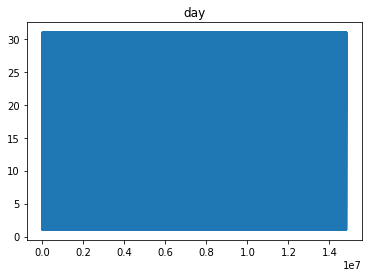

In [51]:

plt.plot(df_final['day'])
plt.title('day')
plt.show()

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

# 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

# 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

# 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

# 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

# 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

# 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by 

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by 

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by 

In [80]:
df_region = pd.read_csv('./dataset/0 REGION.csv')
df_region

C:\Users\popcorn\AppData\Local\Temp\ipykernel_3400\3447070485.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [81]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [82]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [62]:
df_pre

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [83]:
df_10 = df_pre.merge(df_region, on='region')

In [84]:
df_10

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,달성군
